In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://www.nytimes.com/interactive/2020/05/24/us/us-coronavirus-deaths-100000.html'
response = requests.get(url)

In [3]:
from sklearn.datasets import make_moons
from imblearn.over_sampling import SMOTE

In [4]:
print(response)  # if 200, it went through

<Response [200]>


In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
t1000=soup.findAll('div', attrs={'class':"g-obit" })

In [365]:
txt=[]
for t in t1000:
    ddate = t.find('div', class_ = "g-obit")
    desc = t.find('div', class_ = 'g-obit-inner').text
   # desc = t.find('div', class_ = 'g-obit-inner')
    desc = desc.replace('”','').replace('.\n','_CHK_').replace('\n','').replace('“','')
    txt.append(desc)
   # print(ddate)
   # print(desc)

In [366]:
df0 = pd.DataFrame(txt ,columns=['raw'])
df = df0.copy()

In [367]:
df[['memo','pinf']] = df.raw.str.split('_CHK_',1,expand = True)
df.pinf = df.pinf.str.replace(', Sr.',' Sr.')
df.pinf = df.pinf.str.replace('_CHK_','')
df[['name','age','loca']] = df.pinf.str.split(',',2,expand = True)
df[['city_county','state']] = df.loca.str.split(',',1,expand = True)
df.state = df.state.str.replace('.','')

In [368]:
df[473:474]

,raw,memo,pinf,name,age,loca,city_county,state
473,Helped establish many credit unions_CHK_Charle...,Helped establish many credit unions,"Charles Donald Neal Sr., 91, Broken Arrow, Okla",Charles Donald Neal Sr.,91,"Broken Arrow, Okla",Broken Arrow,Okla


In [369]:
df2 = df.drop(['raw','pinf'], axis=1).copy()

In [370]:
tokenized_txt = df2['memo'].apply(lambda x: x.split())
tokenized_txt.head()

0                       [Auditor, in, Silicon, Valley]
1           [Great-grandmother, with, an, easy, laugh]
2    [Wife, with, little, time, to, enjoy, a, new, ...
3                                [Sharecropper’s, son]
4       [Cancer, survivor, born, in, the, Philippines]
Name: memo, dtype: object

In [371]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_txt = tokenized_txt.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_txt.head()

0                       [auditor, in, silicon, valley]
1             [great-grandmoth, with, an, easi, laugh]
2    [wife, with, littl, time, to, enjoy, a, new, m...
3                                 [sharecropper’, son]
4         [cancer, survivor, born, in, the, philippin]
Name: memo, dtype: object

In [372]:
for i in range(len(tokenized_txt)):
    tokenized_txt[i] = ' '.join(tokenized_txt[i])

df2['tidy_memo'] = tokenized_txt

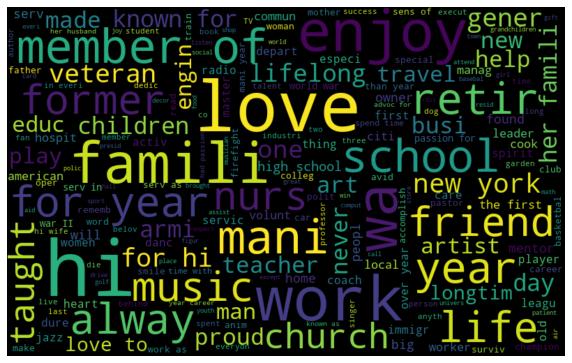

In [373]:
all_words = ' '.join([text for text in df2['tidy_memo']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()